In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("kc_house_data (1).csv")

In [15]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
k = 0
for i in df["bathrooms"]:
    if i<1:
        df["bathrooms"][k] = 1
    k += 1


<ipython-input-4-151f50a07b84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bathrooms"][k] = 1


In [13]:
df["bathrooms"] = df["bathrooms"].astype(int)

[1,
 2,
 1,
 3,
 2,
 4,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,


In [14]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement']].values
Y = df['price'].values

In [29]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
# print the data
x_train

array([[4.00e+00, 2.00e+00, 3.00e+03, ..., 8.00e+00, 3.00e+03, 0.00e+00],
       [3.00e+00, 2.00e+00, 1.96e+03, ..., 7.00e+00, 1.41e+03, 5.50e+02],
       [4.00e+00, 1.00e+00, 1.14e+03, ..., 7.00e+00, 1.14e+03, 0.00e+00],
       ...,
       [3.00e+00, 1.00e+00, 1.38e+03, ..., 7.00e+00, 1.08e+03, 3.00e+02],
       [3.00e+00, 1.00e+00, 1.90e+03, ..., 7.00e+00, 1.30e+03, 6.00e+02],
       [3.00e+00, 2.00e+00, 1.49e+03, ..., 7.00e+00, 1.49e+03, 0.00e+00]])

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.fit(x_train,y_train)
r2_score(y_test, lr.predict(x_test))*100.

54.59527693392203

In [30]:
poly = PolynomialFeatures(2)
X_transformed = poly.fit_transform(X)
poly.fit(X_transformed,Y)
lr.fit(X_transformed,Y)

LinearRegression()

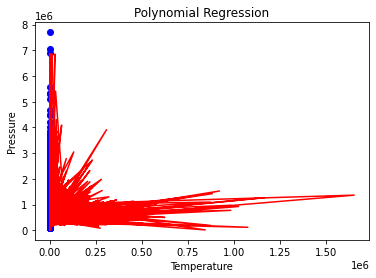

In [46]:
plt.scatter(X[: ,1], Y, color = 'blue')
  
plt.plot(X, lr.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

In [33]:

x_test_tr = poly.fit_transform(x_test)
l=r2_score(y_test, lr.predict(x_test_tr))*100.

64.51296138190128

In [7]:
lr.predict(x_test)

array([690195.25811035, 269703.34335556, 291496.6558481 , ...,
       398263.91949147, 149445.17471266, 522947.04300266])

In [8]:
lr.coef_

array([-4.47806315e+04, -1.78883265e+04,  1.57381969e+02, -3.37548889e-01,
       -3.28555526e+03,  5.67709964e+04,  1.09360313e+05,  4.95403353e+01,
        1.07841633e+02])

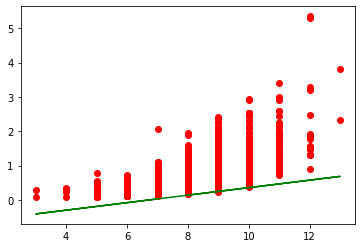

In [9]:
index = 6
Xx = x_test[:, index]

Z = np.array([lr.coef_[index]*x + lr.intercept_ for x in Xx])
plt.scatter(Xx, y_test/1e6, color = "red")
plt.plot(Xx, Z/1e6, color = "green")
# plt.title("Salary vs Experience (Training set)")
# plt.xlabel("input")
# plt.ylabel("price")
# plt.show()


In [10]:
from sklearn.metrics import r2_score

r2_score(y_test, lr.predict(x_test))*100

55.567226836376314

C:\Users\abde llatif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

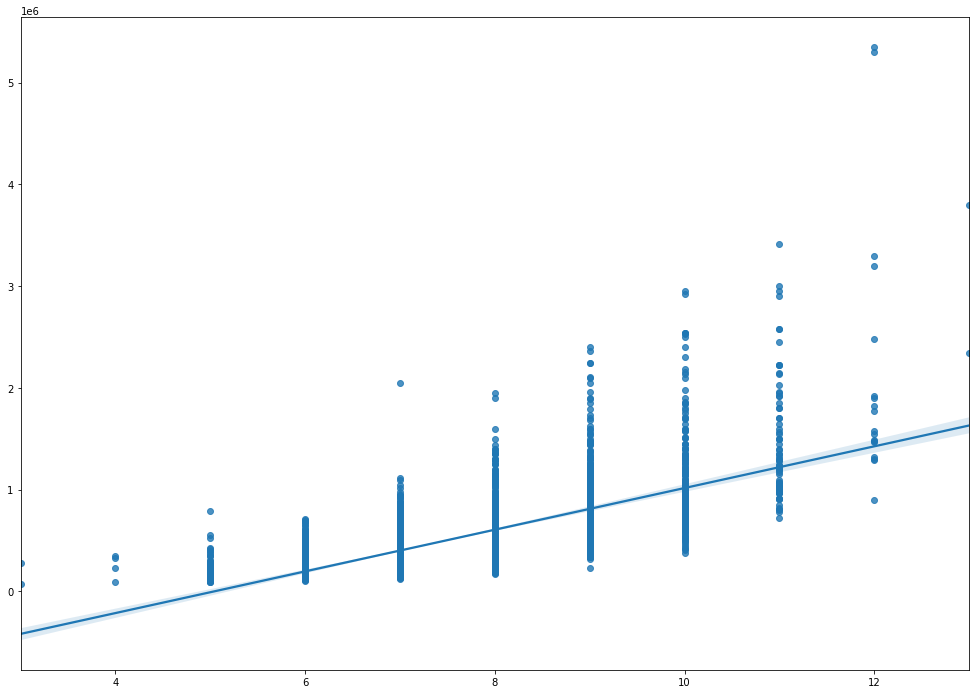

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17, 12))
sns.regplot(Xx, y_test, ax=ax)

In [ ]:
#find the best train data and test data
m=1
for i in range(300):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
    # print the data

    poly = PolynomialFeatures(2)
    X_transformed = poly.fit_transform(X)
    poly.fit(X_transformed,Y)
    lr.fit(X_transformed,Y)

    x_test_tr = poly.fit_transform(x_test)
    l=r2_score(y_test, lr.predict(x_test_tr))*100.
    if l > m:
        m = r2_score(y_test, lr.predict(x_test_tr))*100.
        x_train_f = X
        x_test_f = x_test
        Y_f = Y
        y_test_f = y_test
        
poly = PolynomialFeatures(2)
X_transformed = poly.fit_transform(x_train_f)
poly.fit(X_transformed,Y_f)
lr.fit(X_transformed,Y_f)

In [59]:
x_test_tr = poly.fit_transform(x_test_f)
r2_score(y_test_f, lr.predict(x_test_tr))*100.

71.19845756336065

In [58]:
m

71.19845756336065